In [320]:
import pandas as pd
import numpy as np

In [321]:
import matplotlib.pyplot as plt

In [322]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [323]:
x = 6 * np.random.rand(200, 1) - 3

In [324]:
y = 0.8 * x**2 + 0.9 * x + 2 + np.random.randn(200, 1)

In [325]:
np.random.randn(200, 1)

array([[-0.37166511],
       [-0.74658262],
       [ 1.30413857],
       [ 0.36837492],
       [-0.01727305],
       [ 0.94245052],
       [ 1.2532854 ],
       [ 0.79393859],
       [ 2.50529904],
       [-0.67929066],
       [-0.45972224],
       [ 1.78586863],
       [ 0.39672282],
       [ 0.17323841],
       [-0.24878536],
       [ 0.31090103],
       [ 0.33851621],
       [-0.49945831],
       [ 1.93305157],
       [-0.59469219],
       [-0.17682889],
       [-1.22373618],
       [-1.34250751],
       [-0.4557838 ],
       [-0.09024079],
       [-1.14206949],
       [-0.84244794],
       [ 0.54014443],
       [ 0.67490617],
       [ 0.68891179],
       [ 1.58976507],
       [-0.02770923],
       [ 0.06756112],
       [-2.27703002],
       [ 0.56678203],
       [ 0.73164285],
       [ 0.91050629],
       [-1.75406525],
       [ 1.06587656],
       [ 0.99989599],
       [-0.61641766],
       [ 1.32102356],
       [-0.17302994],
       [-2.32179144],
       [-0.32999587],
       [ 0

In [326]:
x

array([[-0.21279886],
       [-0.34376811],
       [ 1.03436272],
       [ 1.35592052],
       [ 0.89945375],
       [ 1.48776397],
       [-1.89618529],
       [ 2.94849549],
       [-2.11973773],
       [ 2.89250864],
       [-1.81113268],
       [ 2.48082815],
       [-1.64211866],
       [ 2.04375661],
       [ 0.28905061],
       [ 1.69312194],
       [-0.7232403 ],
       [-0.53100782],
       [-1.59522241],
       [-2.78567532],
       [ 0.57810118],
       [ 2.1693297 ],
       [ 1.54026465],
       [ 0.56803922],
       [ 2.84370571],
       [-0.97284361],
       [-2.78686784],
       [ 1.29477545],
       [ 1.04495321],
       [ 0.41117985],
       [ 1.89463762],
       [ 2.47234798],
       [ 1.39576549],
       [ 1.29014918],
       [ 2.67121611],
       [-1.94659408],
       [ 0.6517855 ],
       [ 1.74402067],
       [-2.97715005],
       [-2.24944281],
       [ 0.50172863],
       [-1.27218014],
       [ 0.76109607],
       [-1.31272097],
       [ 1.17423148],
       [-2

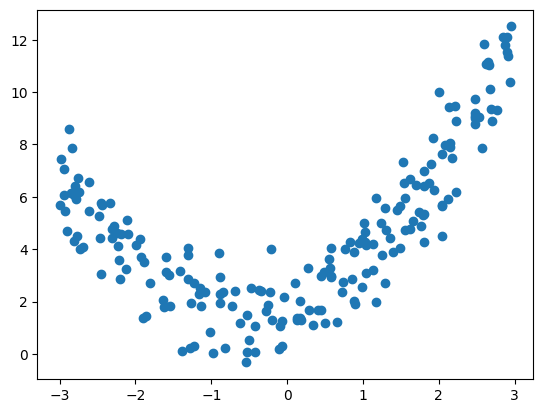

In [327]:
plt.scatter(x,y)


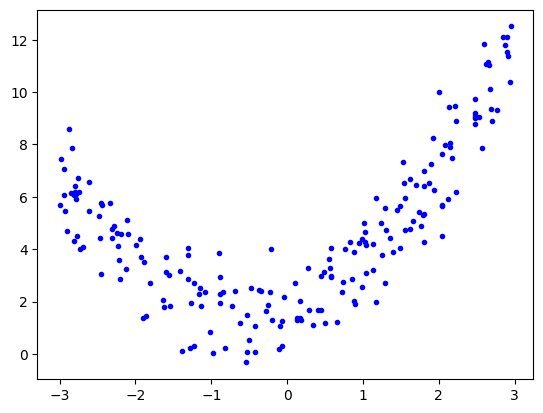

In [328]:
plt.plot(x,y,'b.')

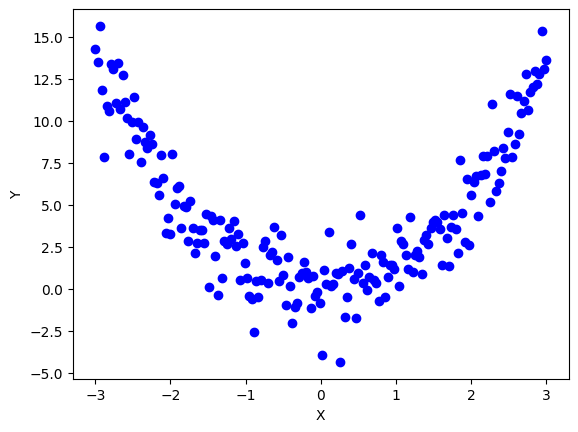

In [329]:

X_quad = np.linspace(-3, 3, 200)


Y_quad = 1.5 * X_quad**2 + np.random.randn(200) * 1.5


plt.scatter(X_quad, Y_quad, color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [330]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [331]:
model = LinearRegression()

In [332]:
model.fit(x_train, y_train)

LinearRegression()

In [333]:
prediction = model.predict(x_test)

In [334]:
r2_score(y_test, prediction)

0.17981159017558013

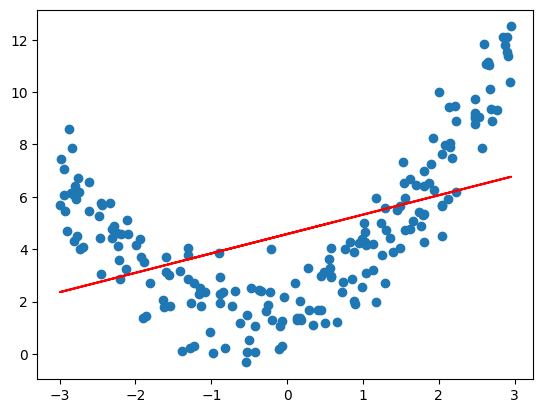

In [335]:
plt.plot(x_train,model.predict(x_train),color='r')
plt.scatter(x, y)

plt.show()

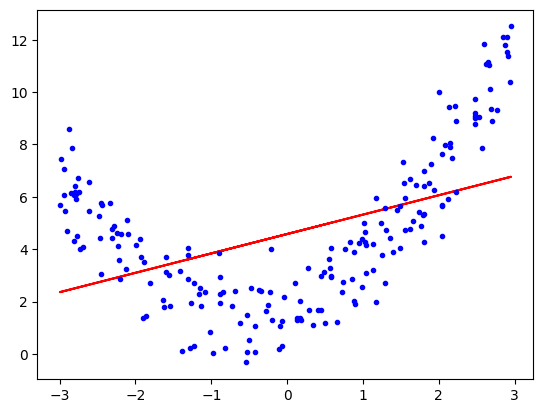

In [336]:
plt.plot(x_train,model.predict(x_train),color='r')
plt.plot(x, y, "b.")
plt.show()

In [337]:
poly_nom = PolynomialFeatures(degree=2,include_bias=True)

In [338]:
x_train_trans = poly_nom.fit_transform(x_train)
x_test_trans = poly_nom.transform(x_test)

In [339]:

x_train[0]


array([-1.30641407])

In [340]:
x_train_trans[0]

array([ 1.        , -1.30641407,  1.70671773])

In [341]:
model2 = LinearRegression()

In [342]:
model2.fit(x_train_trans, y_train)

LinearRegression()

In [343]:
prediction2 = model2.predict(x_test_trans)

In [344]:
r2_score(y_test, prediction2)

0.8579719549084165

In [345]:
model2.intercept_

array([1.84746591])

In [346]:
model2.coef_

array([[0.        , 0.89422159, 0.8384202 ]])

In [347]:
x_new=np.linspace(-3, 3, 200).reshape(200, 1)


In [348]:
x_new_poly = poly_nom.transform(x_new)

In [349]:
y_new = model2.predict(x_new_poly)

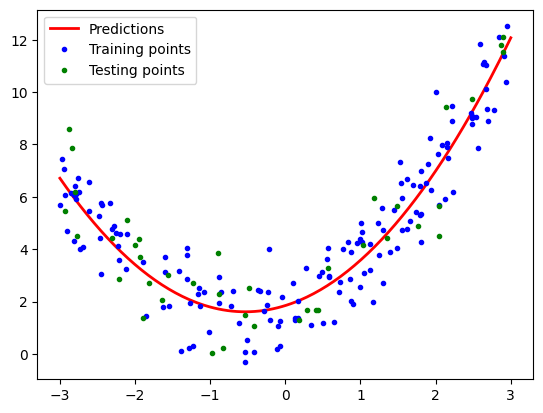

In [350]:

plt.plot(x_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')

plt.legend()
plt.show()

In [351]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly_nom.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(x, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

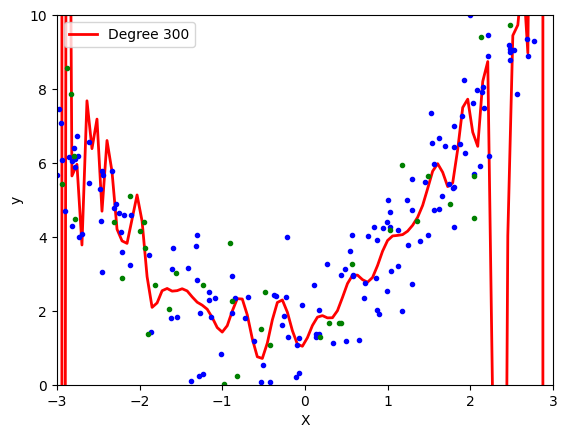

In [352]:
polynomial_regression(300)

In [353]:
poly_nom.powers_

array([[0],
       [1],
       [2]], dtype=int64)

C:\Users\shoab\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



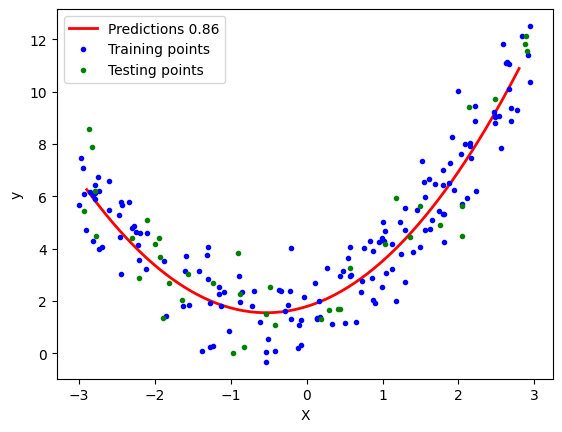

In [354]:
poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(x_train)
X_test_trans = poly.transform(x_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans,y_train)

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [355]:
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

In [356]:
z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)

In [357]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [358]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [359]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [360]:

X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [361]:
poly = PolynomialFeatures(degree=30)
X_multi_trans = poly.fit_transform(X_multi)

In [362]:
poly.n_features_in_

2

In [363]:
poly.n_output_features_

496

In [364]:
poly.powers_

array([[ 0,  0],
       [ 1,  0],
       [ 0,  1],
       [ 2,  0],
       [ 1,  1],
       [ 0,  2],
       [ 3,  0],
       [ 2,  1],
       [ 1,  2],
       [ 0,  3],
       [ 4,  0],
       [ 3,  1],
       [ 2,  2],
       [ 1,  3],
       [ 0,  4],
       [ 5,  0],
       [ 4,  1],
       [ 3,  2],
       [ 2,  3],
       [ 1,  4],
       [ 0,  5],
       [ 6,  0],
       [ 5,  1],
       [ 4,  2],
       [ 3,  3],
       [ 2,  4],
       [ 1,  5],
       [ 0,  6],
       [ 7,  0],
       [ 6,  1],
       [ 5,  2],
       [ 4,  3],
       [ 3,  4],
       [ 2,  5],
       [ 1,  6],
       [ 0,  7],
       [ 8,  0],
       [ 7,  1],
       [ 6,  2],
       [ 5,  3],
       [ 4,  4],
       [ 3,  5],
       [ 2,  6],
       [ 1,  7],
       [ 0,  8],
       [ 9,  0],
       [ 8,  1],
       [ 7,  2],
       [ 6,  3],
       [ 5,  4],
       [ 4,  5],
       [ 3,  6],
       [ 2,  7],
       [ 1,  8],
       [ 0,  9],
       [10,  0],
       [ 9,  1],
       [ 8,  2],
       [ 7,  3

In [365]:

X_multi_trans.shape

(100, 496)

In [366]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [367]:

X_test_multi = poly.transform(final)

In [368]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [369]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

In [370]:
fig

In [371]:
fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

In [372]:
fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

In [373]:
fig.show()